In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import scipy.stats as scs

In [2]:
# Function that returns the historical volatility
def hist_vol(log_rets):
    vol_day = stat.stdev(log_rets)
    vol_year = vol_day * np.sqrt(252)
    return vol_year

# Function that shows the histogram of log-returns
def show_histogram(log_rets):
    plt.figure(figsize=(10, 6))
    plt.hist(log_rets, bins=50, color='red')
    plt.xlabel('Log-returns of stock price')
    plt.ylabel('Frequency')
    plt.title('Log-return distribution')
    
# Function that executes the normal test on log-returns
def normal_test(log_rets):
    # Compute skew and kurtosis
    skew = scs.skew(log_rets)
    kurtosis = scs.kurtosis(log_rets)
    print(f'Skew of sample log-returns {skew:.6f}')
    print(f'Kurtosis of sample log-returns {kurtosis:.6f}')
    
    # Execute the skew test
    p_value = scs.skewtest(log_rets)[1]
    print(f'Skew Normal test {p_value:.6f}')
    
    # Execute the kurtosis test
    p_value = scs.kurtosistest(log_rets)[1]
    print(f'Kurtosis Normal test {p_value:.6f}')
    
    # Execute the normal test
    p_value = scs.normaltest(log_rets)[1]
    print(f'Normal test {p_value:.6f}')

In [3]:
# List of tickers
tickers = ['AMZN', 'TSLA', 'BTC-USD', 'ETH-USD']

HV AMZN 0.28571122682974076
Skew of sample log-returns 0.427840
Kurtosis of sample log-returns 2.489806
Skew Normal test 0.006200
Kurtosis Normal test 0.000013
Normal test 0.000002

HV TSLA 0.5097859934366412
Skew of sample log-returns 0.198619
Kurtosis of sample log-returns 2.788985
Skew Normal test 0.190572
Kurtosis Normal test 0.000004
Normal test 0.000010

HV BTC-USD 0.38824053151234267
Skew of sample log-returns 0.182848
Kurtosis of sample log-returns 2.474940
Skew Normal test 0.148517
Kurtosis Normal test 0.000000
Normal test 0.000001

HV ETH-USD 0.41543076415361624
Skew of sample log-returns 0.178781
Kurtosis of sample log-returns 2.925322
Skew Normal test 0.157618
Kurtosis Normal test 0.000000
Normal test 0.000000



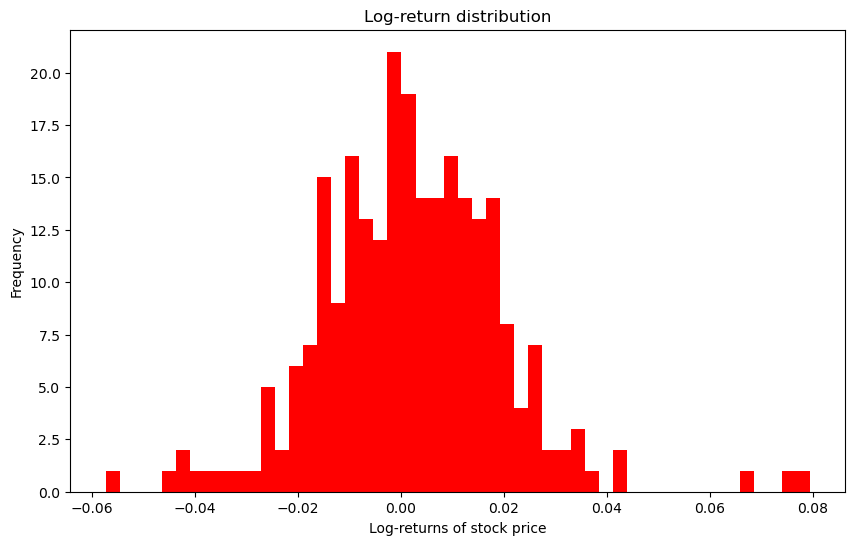

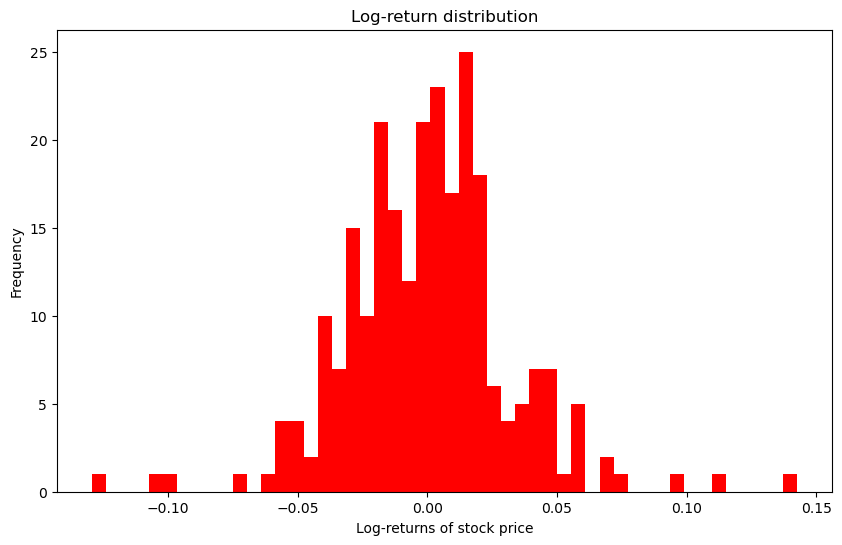

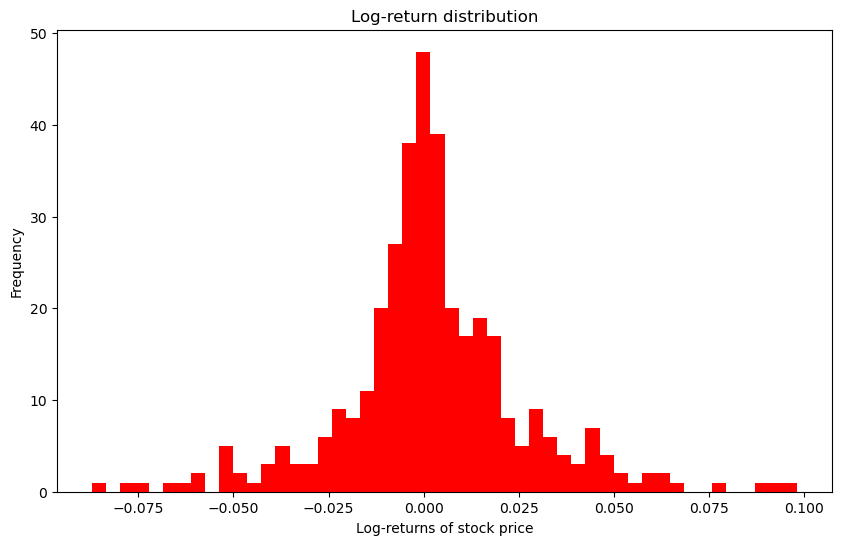

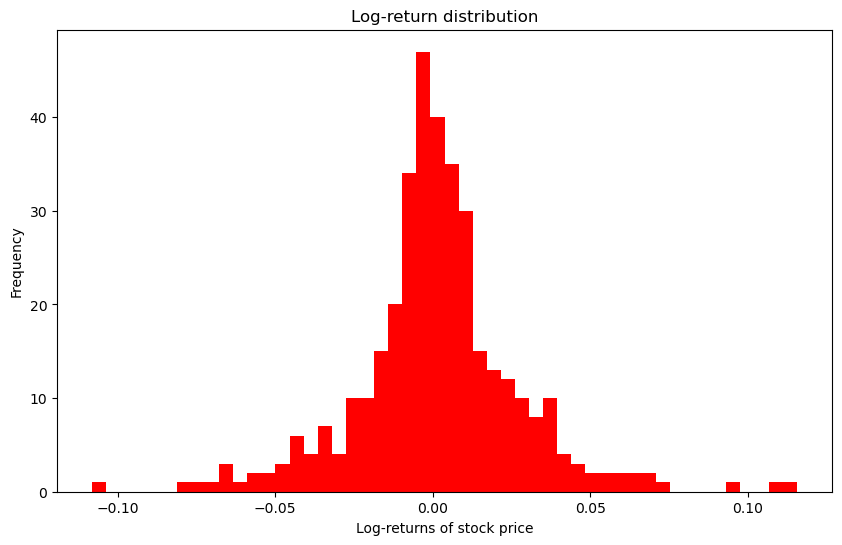

In [4]:
# For each ticker compute log_rets and call functions
# hist_vol(log_rets), show_histogram(log_rets) and normal_test(log_rets) 
for ticker in tickers:
    # Load the prices of the current ticker
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period='1y')
    prices = hist_data['Close']
    
    # Compute the log-returns of the current ticker
    log_rets = np.log(prices / prices.shift(1))
    log_rets = log_rets.dropna()
    
    # Print the historical volatility
    print('HV', ticker, hist_vol(log_rets))
    
    # Show the histogram
    show_histogram(log_rets)
    
    # Execute the normal test
    normal_test(log_rets)
    
    # Print a new line
    print()